# Исследование рынка компьютерных игр.

## Описание

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).

Выявивим определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед нами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й.

ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

#### Загрузим библиотеки, настроим вывод графиков

In [1]:
import numpy as np
import pandas as pd

from scipy import stats as st

import matplotlib.pyplot as plt
import seaborn as sns

Некоторые общие настройки

In [2]:
sns.set_theme()
pd.options.display.float_format = '{:.2f}'.format
plt.rcParams['figure.figsize'] = (15.0, 10.0)

## Обзор проекта

<p>Цели проекта: изучить влияние оценок пользователей критиков и пользователей на продажи игр, сравнить продажи игр разных жанров, определить региональные особенности рынка компьютерных игр, а также сравнить пользовательские оценки двух платформ и двух жанров.</p>
<p>Проект включает следующие этапы:<br>
1. Загрузка и обзор данных,<br>
2. Предобработка данных,<br>
3. Исследовательский анализ,<br>
4. Выводы.</p>
<p>На этапе предобработки были исследованы и обработаны по необходимости пропуски в данных, повторы, были преобразованы типы данных, приведены к единому стилю названия заголовков. Отдельно были проанализированы и обработаны выбросы и аномалии в данных.</p>
<p>Исследовательский анализ позволил выделить перспективные с точки зрения продаж платформы, оценить степень влияния оценок пользователей и критиков на различные платформы, выделить наиболее перспективные жанры игр.<br>
Проанализированы региональные особенности: выявлены наиболее популярные платформы для каждого региона, а также наиболее популярные жанры в региональном разрезе. Проведена оценка влияния рейтинга ESRB.<br>
В завершение исследовательской части провели сравнение средних пользовательских рейтингов платформ XOne и PC, а также сравнение средних пользовательских рейтингов жанров Action и Sports.</p>
<p>Работа завершается выводами и рекомендациями.</p>
<p>Этапы проекта снабжены соответствующими комментариями, промежуточными выводами.</p>

## Считаем данные

In [3]:
data = pd.read_csv('games.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.00,Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,1985.00,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.00,Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,2009.00,Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.00,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Предварительно наблюдаем пропуски в данных, а также необходимость преобразовать типы данных и переименовать заголовки столбцов. Подробнее разберем в следующих разделах.

## Подготовка данных

#### Переименуем заголовки столбцов

Приведем наименования столбцов к ***snake_case***.

In [6]:
data.columns = data.columns.str.lower()

#### Преобразуем типы данных.

Столбец "Год выпуска" необходимо преобразовать в тип ***дата / время***. Преобразование проведем после обработки пропусков ниже.

Столбец "Пользовательские оценки" преобразуем в тип ***float***. Проверим уникальные значения:

In [7]:
data['user_score'].sort_values().unique()

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', 'tbd', nan], dtype=object)

Помимо числовых значений (оценки) встречаются пропуски и значение 'TBD' - будет анонсировано, при преобразовании с настройкой обработки ошибок 'сoerce' такие значения будут переведены в NaN, которые мы, в свою очередь заполним ниже.

In [8]:
data['user_score'] = pd.to_numeric(data['user_score'], errors = 'coerce')

Оценки преобразовали.

Переведем в нижний регистр содержимое столбцов

In [9]:
data['name'] = data['name'].str.lower()

In [10]:
data['platform'] = data['platform'].str.lower()

In [11]:
data['genre'] = data['genre'].str.lower()

Корректность преобразований проверим ниже.

#### Обработаем дубликаты.

Явные дубликаты:

In [12]:
print('Количество явных полных дубликатов строк: {}'.format(data.duplicated().sum()))

Количество явных полных дубликатов строк: 0


Явные дубликаты отсутствуют.

Немного причешем названия

In [13]:
def correct_names(raw):
    try:
        return ' '.join(raw.split())
    except:
        print(raw)

In [14]:
data['name'] = data['name'].apply(correct_names)

nan
nan


Заполнить пропуски в названиях теперь необходимо тут.

In [15]:
data['name'] = data['name'].fillna('unknown_name')

In [16]:
print('Количество уникальных названий игр: {}' \
      .format(len(data['name'].sort_values(ascending = True).unique())))

Количество уникальных названий игр: 11559


создадим новый столбец для дальнейшей сверки

In [17]:
data['name_platform'] = (data['name']) + ' ' + (data['platform'])

проверим

In [18]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,name_platform
0,wii sports,wii,2006.00,sports,41.36,28.96,3.77,8.45,76.00,8.00,E,wii sports wii
1,super mario bros.,nes,1985.00,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,super mario bros. nes
2,mario kart wii,wii,2008.00,racing,15.68,12.76,3.79,3.29,82.00,8.30,E,mario kart wii wii
3,wii sports resort,wii,2009.00,sports,15.61,10.93,3.28,2.95,80.00,8.00,E,wii sports resort wii
4,pokemon red/pokemon blue,gb,1996.00,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,pokemon red/pokemon blue gb


оценим дубликаты

In [19]:
data['name_platform'].duplicated().sum()

5

In [20]:
data[data['name_platform'].duplicated()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,name_platform
1591,need for speed: most wanted,x360,2005.00,racing,1.00,0.13,0.02,0.10,83.00,8.50,T,need for speed: most wanted x360
4127,sonic the hedgehog,ps3,NaN,platform,0.00,0.48,0.00,0.00,43.00,4.10,E10+,sonic the hedgehog ps3
11715,need for speed: most wanted,pc,2012.00,racing,0.00,0.06,0.00,0.02,82.00,8.50,T,need for speed: most wanted pc
14244,unknown_name,gen,1993.00,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN,unknown_name gen
16230,madden nfl 13,ps3,2012.00,sports,0.00,0.01,0.00,0.00,83.00,5.50,E,madden nfl 13 ps3


In [21]:
data[(data['name'] == 'need for speed: most wanted') & (data['platform'] == 'x360')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,name_platform
1190,need for speed: most wanted,x360,2012.00,racing,0.62,0.78,0.01,0.15,83.00,8.50,T,need for speed: most wanted x360
1591,need for speed: most wanted,x360,2005.00,racing,1.00,0.13,0.02,0.10,83.00,8.50,T,need for speed: most wanted x360


Выше две разных игры (инфо из Вики), оставляем

In [22]:
data[(data['name'] == 'sonic the hedgehog') & (data['platform'] == 'ps3')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,name_platform
1745,sonic the hedgehog,ps3,2006.00,platform,0.41,0.06,0.04,0.66,43.00,4.10,E10+,sonic the hedgehog ps3
4127,sonic the hedgehog,ps3,NaN,platform,0.00,0.48,0.00,0.00,43.00,4.10,E10+,sonic the hedgehog ps3


Удаляем 4127

In [23]:
data.drop(4127, inplace = True)

In [24]:
data[(data['name'] == 'need for speed: most wanted') & (data['platform'] == 'pc')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,name_platform
5972,need for speed: most wanted,pc,2005.00,racing,0.02,0.23,0.00,0.04,82.00,8.50,T,need for speed: most wanted pc
11715,need for speed: most wanted,pc,2012.00,racing,0.00,0.06,0.00,0.02,82.00,8.50,T,need for speed: most wanted pc


Выше две разных игры, оставляем

In [25]:
data[(data['name'] == 'unknown_name') & (data['platform'] == 'gen')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,name_platform
659,unknown_name,gen,1993.00,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN,unknown_name gen
14244,unknown_name,gen,1993.00,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN,unknown_name gen


In [26]:
data.drop(659, inplace = True)

In [27]:
data.drop(14244, inplace = True)

In [28]:
data[(data['name'] == 'madden nfl 13') & (data['platform'] == 'ps3')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,name_platform
604,madden nfl 13,ps3,2012.00,sports,2.11,0.22,0.00,0.23,83.00,5.50,E,madden nfl 13 ps3
16230,madden nfl 13,ps3,2012.00,sports,0.00,0.01,0.00,0.00,83.00,5.50,E,madden nfl 13 ps3


удаляем 16230

In [29]:
data.drop(16230, inplace = True)

In [30]:
data[data['name_platform'].duplicated()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,name_platform
1591,need for speed: most wanted,x360,2005.00,racing,1.00,0.13,0.02,0.10,83.00,8.50,T,need for speed: most wanted x360
11715,need for speed: most wanted,pc,2012.00,racing,0.00,0.06,0.00,0.02,82.00,8.50,T,need for speed: most wanted pc


Поскольку в дальнейшем переходим к анализу агрегированных данных по платформам, жанрам и т. д. обработкой дубликатов в наименованиях можем пренебречь ввиду большого количества наименований.

In [31]:
print(list(data['platform'].sort_values(ascending = True).unique()))

['2600', '3do', '3ds', 'dc', 'ds', 'gb', 'gba', 'gc', 'gen', 'gg', 'n64', 'nes', 'ng', 'pc', 'pcfx', 'ps', 'ps2', 'ps3', 'ps4', 'psp', 'psv', 'sat', 'scd', 'snes', 'tg16', 'wii', 'wiiu', 'ws', 'x360', 'xb', 'xone']


В названиях платформ дубликатов нет.

In [32]:
print(list(data['genre'].sort_values(ascending = True).unique()))

['action', 'adventure', 'fighting', 'misc', 'platform', 'puzzle', 'racing', 'role-playing', 'shooter', 'simulation', 'sports', 'strategy']


В названиях жанров дубликатов нет.

Дубликаты обработаны.

#### Добавим данные о суммарных продажах

In [33]:
data['summary_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] \
+ data['other_sales']

#### Освежим сведения

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16711 entries, 0 to 16714
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16711 non-null  object 
 1   platform         16711 non-null  object 
 2   year_of_release  16443 non-null  float64
 3   genre            16711 non-null  object 
 4   na_sales         16711 non-null  float64
 5   eu_sales         16711 non-null  float64
 6   jp_sales         16711 non-null  float64
 7   other_sales      16711 non-null  float64
 8   critic_score     8135 non-null   float64
 9   user_score       7588 non-null   float64
 10  rating           9947 non-null   object 
 11  name_platform    16711 non-null  object 
 12  summary_sales    16711 non-null  float64
dtypes: float64(8), object(5)
memory usage: 1.8+ MB


In [35]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,name_platform,summary_sales
0,wii sports,wii,2006.00,sports,41.36,28.96,3.77,8.45,76.00,8.00,E,wii sports wii,82.54
1,super mario bros.,nes,1985.00,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,super mario bros. nes,40.24
2,mario kart wii,wii,2008.00,racing,15.68,12.76,3.79,3.29,82.00,8.30,E,mario kart wii wii,35.52
3,wii sports resort,wii,2009.00,sports,15.61,10.93,3.28,2.95,80.00,8.00,E,wii sports resort wii,32.77
4,pokemon red/pokemon blue,gb,1996.00,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,pokemon red/pokemon blue gb,31.38


In [36]:
data.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,summary_sales
count,16443.00,16711.00,16711.00,16711.00,16711.00,8135.00,7588.00,16711.00
mean,2006.49,0.26,0.15,0.08,0.05,68.97,7.13,0.53
std,5.88,0.81,0.50,0.31,0.19,13.94,1.50,1.55
min,1980.00,0.00,0.00,0.00,0.00,13.00,0.00,0.00
25%,2003.00,0.00,0.00,0.00,0.00,60.00,6.40,0.06
50%,2007.00,0.08,0.02,0.00,0.01,71.00,7.50,0.17
75%,2010.00,0.24,0.11,0.04,0.03,79.00,8.20,0.47
max,2016.00,41.36,28.96,10.22,10.57,98.00,9.70,82.54


Обработка прошла корректно, напомню, год обработаем ниже. Какие то выводы делать преждевременно, используем вышеприведенные сведения для контроля вносимых изменений.

#### Оценим количество пропусков

Количество пропусков в столбцах выведем в процентном соотношении (к общему количеству строк) в графическом виде с сортировкой по убыванию

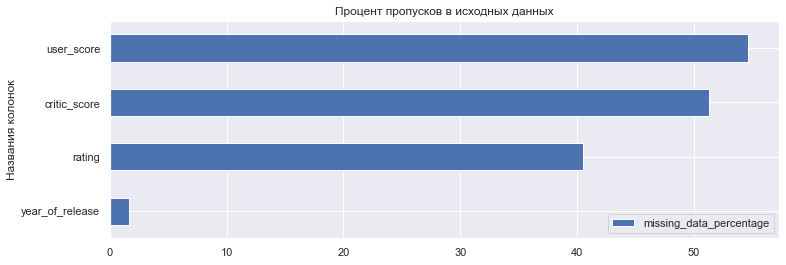

In [37]:
(data.isna().mean() * 100).sort_values(ascending = True).to_frame() \
.rename(columns = {0:'missing_data_percentage'}).query('missing_data_percentage > 0') \
.plot(kind = 'barh', figsize = (12, 4), xlabel = 'Названия колонок', ylabel = 'Проценты',
      title = 'Процент пропусков в исходных данных')
plt.show()

Наибольшее количество пропусков в столбцах оценок пользователей и критиков, а также рейтингов.

In [38]:
data['rating'] = data['rating'].fillna('No_Rating')

Проверим неявные пропуски (заглушки): они отсутствуют.

In [39]:
print(list(data['year_of_release'].sort_values(ascending = True).unique()))

[1980.0, 1981.0, 1982.0, 1983.0, 1984.0, 1985.0, 1986.0, 1987.0, 1988.0, 1989.0, 1990.0, 1991.0, 1992.0, 1993.0, 1994.0, 1995.0, 1996.0, 1997.0, 1998.0, 1999.0, 2000.0, 2001.0, 2002.0, 2003.0, 2004.0, 2005.0, 2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015.0, 2016.0, nan]


Проведем удаление пропусков:

In [40]:
platforms_list = list(data['platform'].unique())

In [41]:
data = data.dropna(subset = ['year_of_release'])

Завершим с годом выпуска преобразованием в соответствующий тип данных, а также создадим отдельный столбец, который будет хранить непосредственно значение года.

In [42]:
data['year_of_release'] = pd.to_datetime(data['year_of_release'], format = '%Y')
data['year'] = pd.DatetimeIndex(data['year_of_release']).year

Промежуточный вывод: заполнили пропуски, средние значения заполненных столбцов изменились несущественно, дисперсия уменьшилась, медиана изменилась незначительно, сократился межквартильный размах.

#### Рассмотрим выбросы и аномалии.

In [43]:
data.describe()

,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,summary_sales,year
count,16443.00,16443.00,16443.00,16443.00,7982.00,7462.00,16443.00,16443.00
mean,0.26,0.15,0.08,0.05,68.99,7.13,0.54,2006.49
std,0.82,0.51,0.31,0.19,13.92,1.50,1.56,5.88
min,0.00,0.00,0.00,0.00,13.00,0.00,0.00,1980.00
25%,0.00,0.00,0.00,0.00,60.00,6.40,0.06,2003.00
50%,0.08,0.02,0.00,0.01,71.00,7.50,0.17,2007.00
75%,0.24,0.11,0.04,0.03,79.00,8.20,0.47,2010.00
max,41.36,28.96,10.22,10.57,98.00,9.70,82.54,2016.00


Перед EDA сбросим индексы

In [44]:
data.reset_index(drop = True, inplace = True)

## Исследовательский анализ

#### <p>Группировка по годам</p>
<p>Ниже рассмотрим динамику продаж по все играм в разбивке по годам.</p>

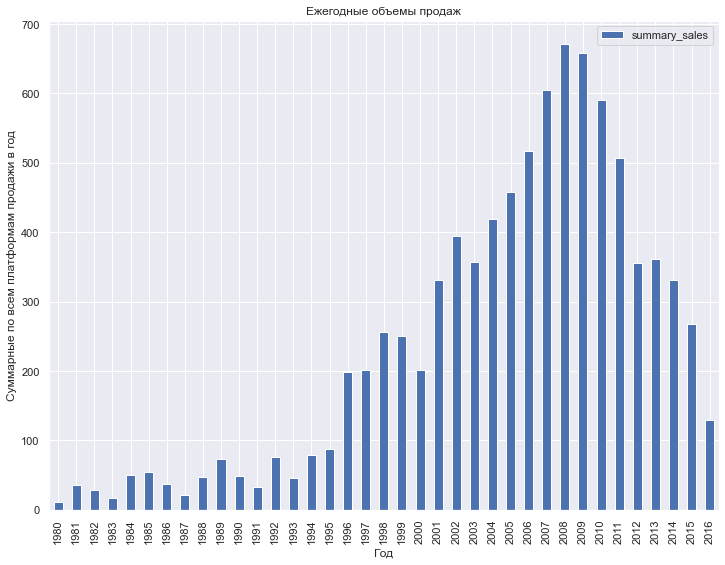

In [45]:
data.pivot_table(index = 'year', values = 'summary_sales', aggfunc = 'sum') \
.plot(kind = 'bar', figsize = (12, 9), title = 'Ежегодные объемы продаж', 
                       xlabel = 'Год', ylabel = 'Суммарные по всем платформам продажи в год')
plt.show()

<p>Можем предположить экспоненциальный характер развития тенденции с циклическим спадом в 2009 - 2016 годах.</p>
<p>Но также можем предположить, что игры, написанные для платформ, несмотря на свое в среднем более высокое качество, вытесняются онлайн-играми, мобильными играми и другими видами активности (соцсети, мессенджеры, онлайн - кинотеатры). Какие либо выводы поможет сдеалать углубленное исследование, включающее другие сегменты.</p>
<p>Мы можем сделать однозначный вывод, что в 1980 - 2009 рынок игр весьма активно рос. После 2009 года следует спад, и, по всей видимости в прогнозе на 2017 год не следует ожидать показателей, близких к рекордам 2009 года. Следует ориентироваться на более консервативные показатели, близкие к 2015 - 2016 годам.</p>

#### <p>Группировка по платформам.</p>
<p>Рассмотрим суммарные показатели продаж по различным платформам, представленные на графике ниже.</p>

Выберем платформы с максимальными продажами.

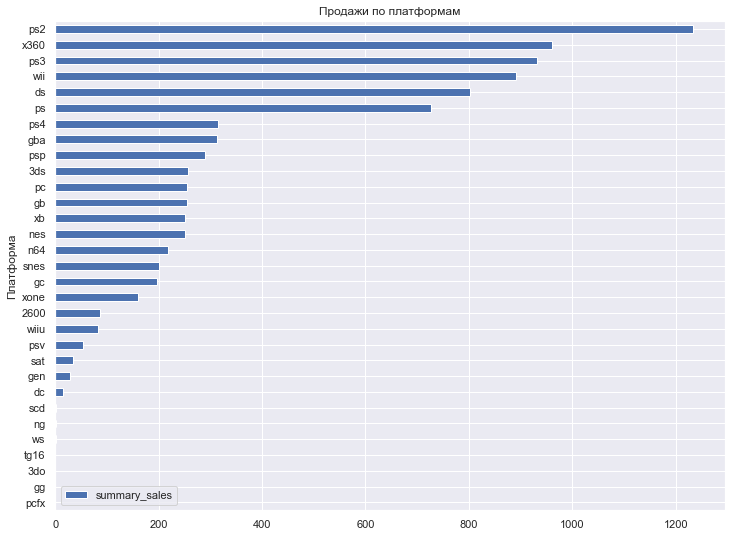

In [46]:
data.pivot_table(index = 'platform', values = 'summary_sales', aggfunc = 'sum') \
.sort_values(by = 'summary_sales') \
.plot(kind = 'barh', figsize = (12, 9), title = 'Продажи по платформам', xlabel = 'Платформа')
plt.show()

Исходя из сортировки платформы с максимальными продажами нашли, но мы помним из графика выше, что максимальные продажи были в 2009 году, в 2015 -2016 продажи сильно упали.

#### Тепловые карты.

По заданию необходимо построить распределение продаж по платформам в разбивке по годам. Мы можем построить гистограммы распределения (несколько штук) для каждой платформы отдельно, но также можем вывести сведения по всем платформам на тепловую карту. На мой взгляд такая визуализация воспринимается более информативно.

Оценить данные одновременно по различным платформам с разбивкой по годам нам поможет тепловая карта. Далее подготовим таблицу для графического отображения.

In [47]:
aggregated_data_table = data.query('1900 <= year < 2100') \
.pivot_table(index = ['platform'], columns = ['year'], values = ['summary_sales'], 
             aggfunc = {'summary_sales': 'sum'}, fill_value = 0, margins = True) \
.sort_values(by = ('summary_sales', 'All'), ascending = False)
aggregated_data_table.head()

summary_sales                                                        \
year              1980  1981  1982  1983  1984  1985  1986  1987  1988  1989   
platform                                                                       
All              11.38 35.68 28.88 16.80 50.35 53.95 37.08 21.70 47.21 73.45   
ps2               0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00   
x360              0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00   
ps3               0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00   
wii               0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00   

          ...                                                                 \
year      ...   2008   2009   2010   2011   2012   2013   2014   2015   2016   
platform  ...                                                                  
All       ... 671.50 658.82 590.13 507.58 355.83 361.24 331.53 267.98 129.94   
ps2       ...  53.90  26.40   5.64   0.45   0.00   0.00   0.00   0.00   0.00   
x360      ... 135.26 120.29 170.03 143.84  99.74  88.58  34.74  11.96   1.52   
ps3       ... 118.52 130.93 142.17 156.78 107.35 113.25  47.76  16.82   3.60   
wii       ... 171.32 206.97 127.95  59.65  21.71   8.59   3.75   1.14   0.18   

                  
year         All  
platform          
All      8814.36  
ps2      1233.56  
x360      961.24  
ps3       931.33  
wii       891.18  

[5 rows x 38 columns]

Суммарные показатели помогают провести сортировку, но мешают на графике, поэтому мы их удаляем и строим график.

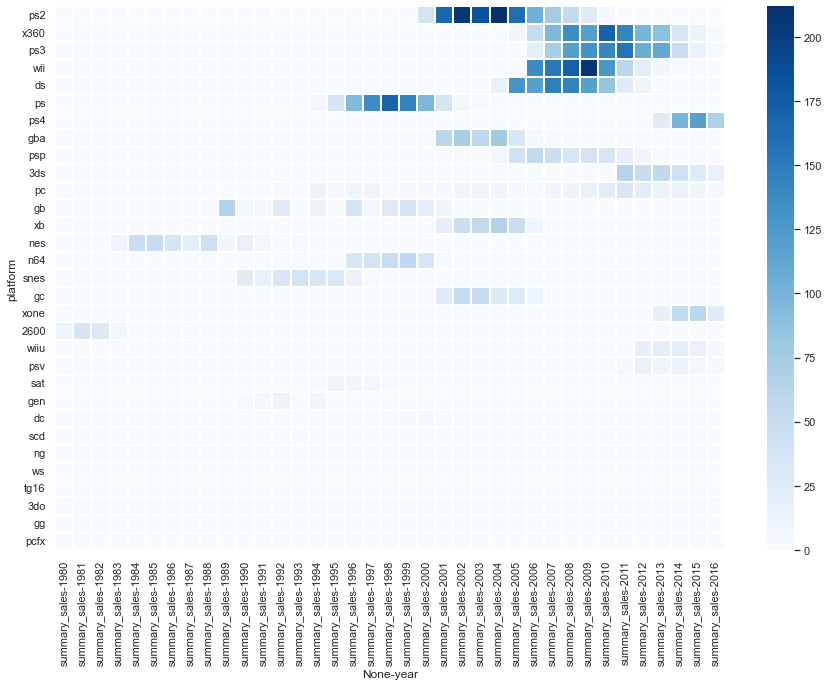

In [48]:
aggregated_data_table \
.drop(['All'], axis = 0, inplace = True)
aggregated_data_table.drop(('summary_sales', 'All'), axis = 1, inplace = True)
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(aggregated_data_table, cmap = 'Blues', linewidth = .005, linecolor = 'white')
plt.show()

<p>Видим, что чемпионы продаж - это приставки предыдущих поколений, на которые мы уже не можем ориентироваться. Эта карта помогает нам выделить список атуальных платформ - находящихся в верхней части списка по продажам с одной стороны и в правой части карты с другой.</p>
<p>Мы выделили PS4, 3DS, XOne, WiiU, PSV. Отдельно идет платформа PC - ее показатели никогда не были выдающимися (настолько, как, например, PS2), но результаты более стабильны во времени (хотя с учетом смены поколений процессоров, видеокарт и т.д. считать PC единой платформой можно довольно условно).</p>

In [49]:
np.median([10, 10, 10, 7, 8, 7, 7, 8, 7, 4, 6, 6, 4, 6, 5, 5, 5, 5])

6.5

In [50]:
np.mean([10, 10, 10, 7, 8, 7, 7, 8, 7, 4, 6, 6, 4, 6, 5, 5, 5, 5])

6.666666666666667

Средний и медианный периоды "жизни" платформы 6 -7 лет

ps3


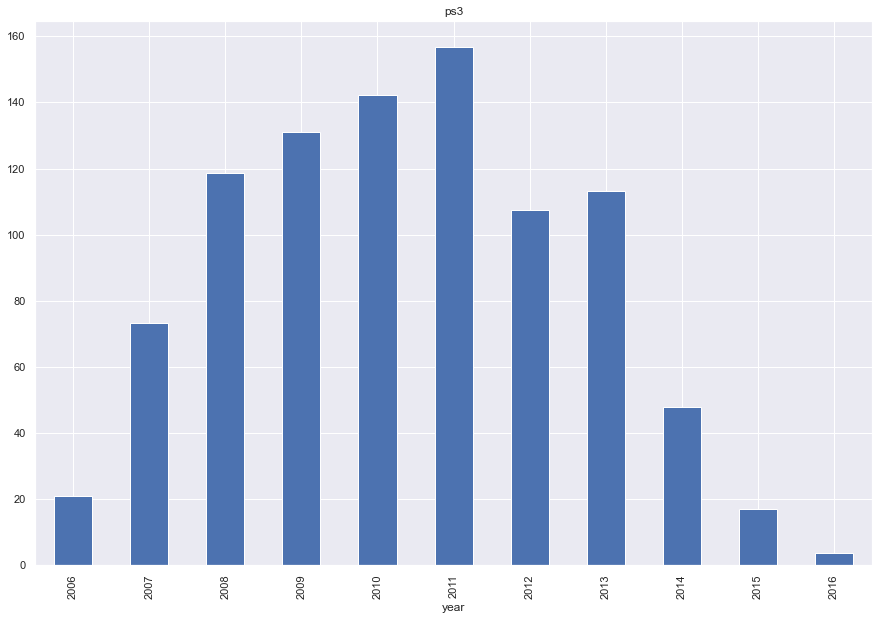

x360


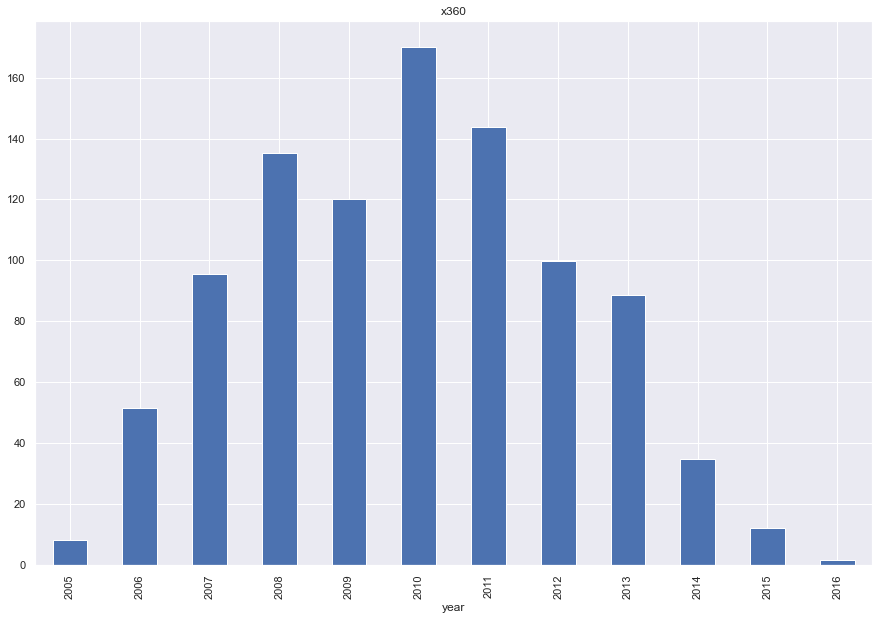

ps2


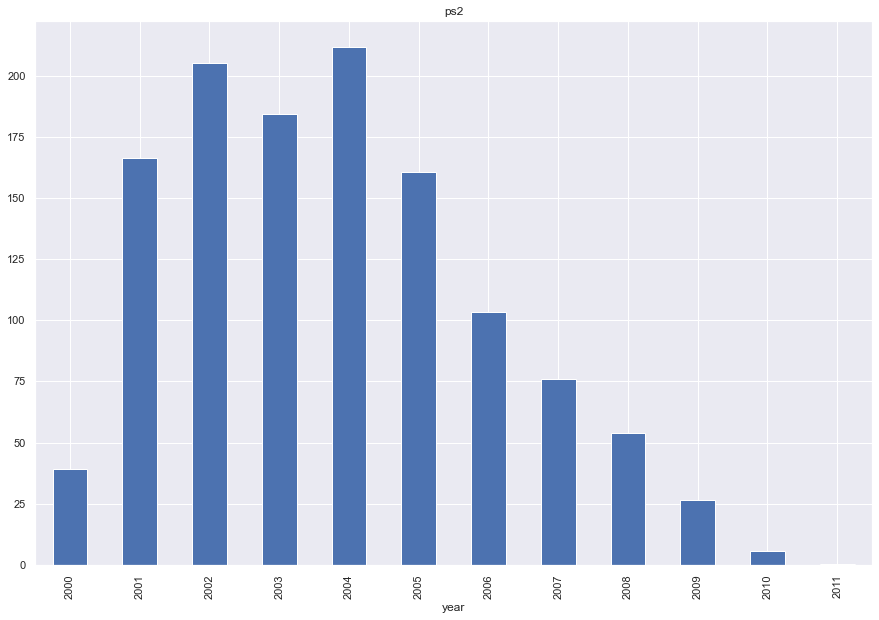

In [51]:
platform_list = ['ps3', 'x360', 'ps2']
for item in platform_list:
    print(item)
    data[data['platform'] == item].groupby('year')['summary_sales'].sum().plot(kind = 'bar', title = item)
    plt.show()

#### Группировка на поколения

Расчет начнем с 2011 года (6 лет всего).

In [52]:
starting_period = 2013

Сформируем сводную таблицу, в которой отразим суммарные продажи по годам.

In [53]:
actual_platforms = \
data.query('(@starting_period <= year < 2100)') \
.pivot_table(index = ['platform'], columns = ['year'], values = ['summary_sales'], 
             aggfunc = {'summary_sales': 'sum'}, fill_value = 0, margins = True) \
.sort_values(by = ('summary_sales', 'All'))
actual_platforms

summary_sales                             
year              2013   2014   2015   2016     All
platform                                           
ds                1.54   0.00   0.00   0.00    1.54
psp               3.14   0.24   0.12   0.00    3.50
wii               8.59   3.75   1.14   0.18   13.66
psv              10.59  11.90   6.25   4.25   32.99
pc               12.38  13.28   8.52   5.25   39.43
wiiu             21.65  22.03  16.35   4.60   64.63
x360             88.58  34.74  11.96   1.52  136.80
3ds              56.57  43.76  27.78  15.14  143.25
xone             18.96  54.07  60.14  26.15  159.32
ps3             113.25  47.76  16.82   3.60  181.43
ps4              25.99 100.00 118.90  69.25  314.14
All             361.24 331.53 267.98 129.94 1090.69

Для списка интересующих нас платформ может быть полезно посчитать долю рынка каждой из них, а также оценить динамику изменения показателя. Таблица ниже поможет нам построить график долей рынка.

In [54]:
actual_platforms_market_share = \
data.query('(@starting_period <= year < 2100)') \
.pivot_table(index = ['year'], columns = ['platform'], values = ['summary_sales'], 
             aggfunc = {'summary_sales': 'sum'}, fill_value = 0, margins = True)
actual_platforms_market_share

summary_sales                                                         \
platform           3ds   ds    pc    ps3    ps4  psp   psv   wii  wiiu   x360   
year                                                                            
2013             56.57 1.54 12.38 113.25  25.99 3.14 10.59  8.59 21.65  88.58   
2014             43.76 0.00 13.28  47.76 100.00 0.24 11.90  3.75 22.03  34.74   
2015             27.78 0.00  8.52  16.82 118.90 0.12  6.25  1.14 16.35  11.96   
2016             15.14 0.00  5.25   3.60  69.25 0.00  4.25  0.18  4.60   1.52   
All             143.25 1.54 39.43 181.43 314.14 3.50 32.99 13.66 64.63 136.80   

                         
platform   xone     All  
year                     
2013      18.96  361.24  
2014      54.07  331.53  
2015      60.14  267.98  
2016      26.15  129.94  
All      159.32 1090.69

График ниже отражает динамику продаж в натуральных единицах (в деньгах)

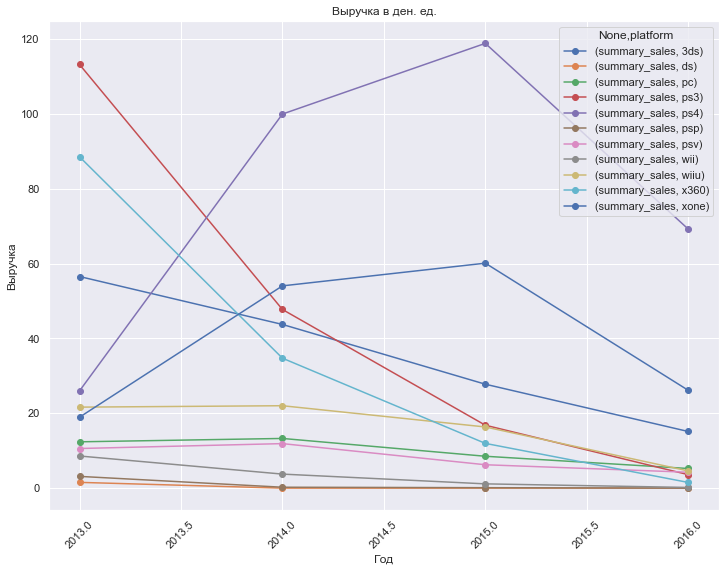

In [55]:
actual_platforms_market_share \
.query('year != "All"') \
.drop(('summary_sales', 'All'), axis = 1, inplace = False) \
.plot(style = 'o-', figsize = (12, 9), title = ('Выручка в ден. ед.'), xlabel = 'Год', 
      ylabel = 'Выручка', rot = 45)
plt.show()

Ниже переведем те же данные в проценты.

In [56]:
for platform_name in list(actual_platforms_market_share.columns):
    actual_platforms_market_share[platform_name] = \
    actual_platforms_market_share[platform_name] / \
    actual_platforms_market_share[('summary_sales', 'All')] * 100

Таблица

In [57]:
actual_platforms_market_share

summary_sales                                                        \
platform           3ds   ds   pc   ps3   ps4  psp  psv  wii wiiu  x360  xone   
year                                                                           
2013             15.66 0.43 3.43 31.35  7.19 0.87 2.93 2.38 5.99 24.52  5.25   
2014             13.20 0.00 4.01 14.41 30.16 0.07 3.59 1.13 6.64 10.48 16.31   
2015             10.37 0.00 3.18  6.28 44.37 0.04 2.33 0.43 6.10  4.46 22.44   
2016             11.65 0.00 4.04  2.77 53.29 0.00 3.27 0.14 3.54  1.17 20.12   
All              13.13 0.14 3.62 16.63 28.80 0.32 3.02 1.25 5.93 12.54 14.61   

                 
platform    All  
year             
2013     100.00  
2014     100.00  
2015     100.00  
2016     100.00  
All      100.00

Удалим лишние столбцы и строки после сортировки

In [58]:
actual_platforms_market_share.drop(('summary_sales', 'All'), axis = 1, inplace = True)

In [59]:
actual_platforms_market_share.drop(['All'], axis = 0, inplace = True)

In [60]:
actual_platforms_market_share

summary_sales                                                      
platform           3ds   ds   pc   ps3   ps4  psp  psv  wii wiiu  x360  xone
year                                                                        
2013             15.66 0.43 3.43 31.35  7.19 0.87 2.93 2.38 5.99 24.52  5.25
2014             13.20 0.00 4.01 14.41 30.16 0.07 3.59 1.13 6.64 10.48 16.31
2015             10.37 0.00 3.18  6.28 44.37 0.04 2.33 0.43 6.10  4.46 22.44
2016             11.65 0.00 4.04  2.77 53.29 0.00 3.27 0.14 3.54  1.17 20.12

График ниже отражает динамику изменения показателя доли рынка в процентах для каждой платформы.

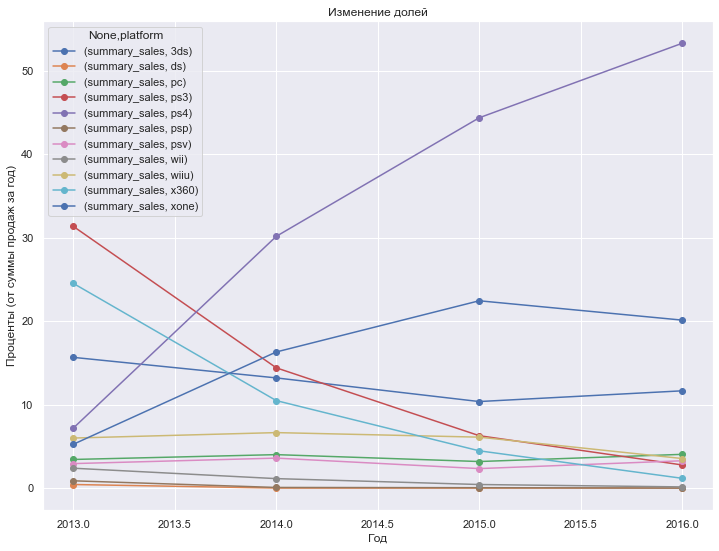

In [61]:
actual_platforms_market_share \
.plot(style = 'o-', figsize = (12, 9), title = 'Изменение долей', xlabel = 'Год', 
      ylabel = 'Проценты (от суммы продаж за год)')
plt.show()

<p>Получили достаточно информативную наглядную вещь:<br>
    PS4 уверенно отвоевывает свою долю рынка, восходящая динамика сохраняется,<br>
    XOne номер два.</p>

#### Выберем соответствующий актуальный период

In [62]:
all_time_champions_list = ['ps2', 'x360', 'ps3', 'wii', 'ds', 'ps']
actual_platforms_list = ['ps4', '3ds', 'xone', 'wiiu', 'psv']
pc_list = ['pc']

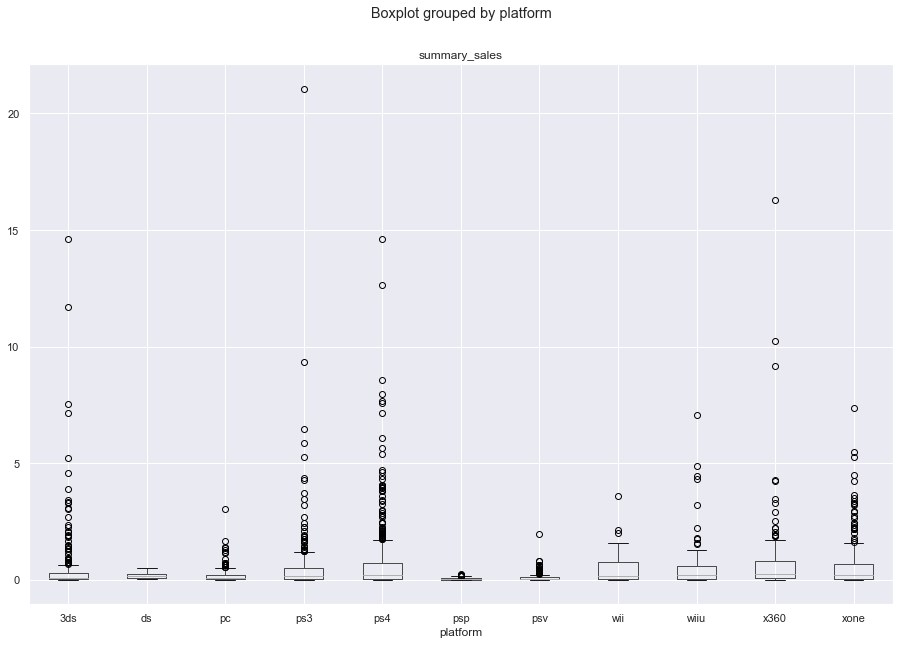

In [63]:
data.query('(@starting_period <= year < 2100)').boxplot(column = 'summary_sales', by = 'platform')
plt.show()

#### Отзывы пользователей и критиков

Подготовим срез по платформе PS4

In [64]:
ps4_data = data.query('platform == "ps4"').reset_index(drop = True)

In [65]:
ps4_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,name_platform,summary_sales,year
0,call of duty: black ops 3,ps4,2015-01-01,shooter,6.03,5.86,0.36,2.38,NaN,NaN,No_Rating,call of duty: black ops 3 ps4,14.63,2015
1,grand theft auto v,ps4,2014-01-01,action,3.96,6.31,0.38,1.97,97.00,8.30,M,grand theft auto v ps4,12.62,2014
2,fifa 16,ps4,2015-01-01,sports,1.12,6.12,0.06,1.28,82.00,4.30,E,fifa 16 ps4,8.58,2015
3,star wars battlefront (2015),ps4,2015-01-01,shooter,2.99,3.49,0.22,1.28,NaN,NaN,No_Rating,star wars battlefront (2015) ps4,7.98,2015
4,call of duty: advanced warfare,ps4,2014-01-01,shooter,2.81,3.48,0.14,1.23,83.00,5.70,M,call of duty: advanced warfare ps4,7.66,2014


In [66]:
ps4_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             392 non-null    object        
 1   platform         392 non-null    object        
 2   year_of_release  392 non-null    datetime64[ns]
 3   genre            392 non-null    object        
 4   na_sales         392 non-null    float64       
 5   eu_sales         392 non-null    float64       
 6   jp_sales         392 non-null    float64       
 7   other_sales      392 non-null    float64       
 8   critic_score     252 non-null    float64       
 9   user_score       257 non-null    float64       
 10  rating           392 non-null    object        
 11  name_platform    392 non-null    object        
 12  summary_sales    392 non-null    float64       
 13  year             392 non-null    int64         
dtypes: datetime64[ns](1), float64(7), int64(1)

In [67]:
ps4_data.describe()

,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,summary_sales,year
count,392.00,392.00,392.00,392.00,252.00,257.00,392.00,392.00
mean,0.28,0.36,0.04,0.12,72.09,6.75,0.80,2015.15
std,0.58,0.81,0.07,0.25,12.49,1.46,1.61,0.87
min,0.00,0.00,0.00,0.00,19.00,1.50,0.01,2013.00
25%,0.01,0.00,0.00,0.01,66.00,6.10,0.06,2015.00
50%,0.06,0.08,0.01,0.03,73.00,7.00,0.20,2015.00
75%,0.26,0.30,0.05,0.11,80.00,7.80,0.73,2016.00
max,6.03,6.31,0.49,2.38,97.00,9.20,14.63,2016.00


Ниже гистограмма распределения значений продаж для каждой игры

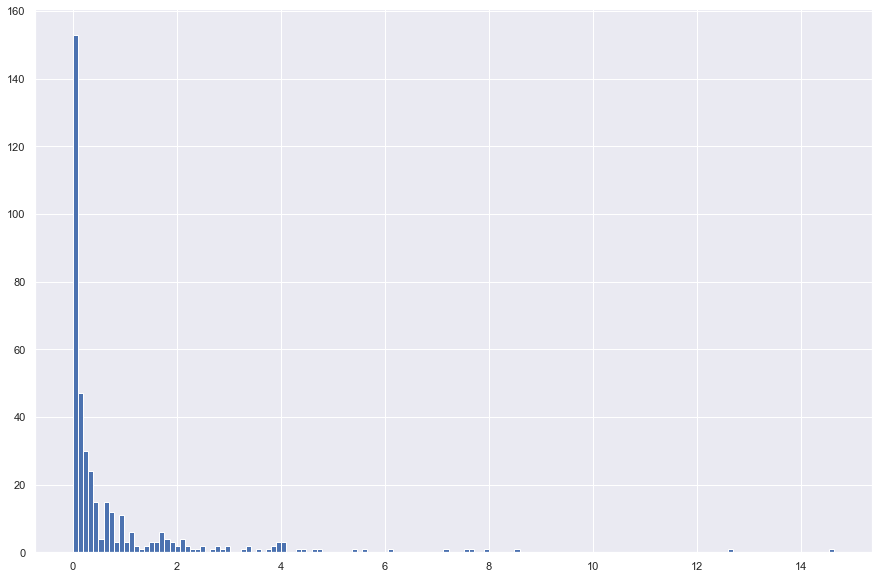

In [68]:
ps4_data['summary_sales'].hist(bins = 150)
plt.show()

Ниже гистограмма распределения значений оценок критиков для каждой игры

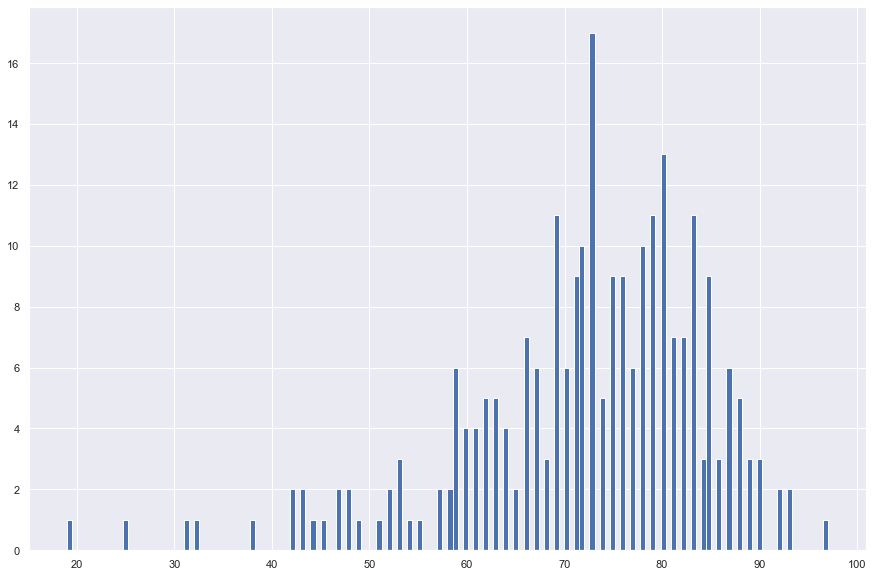

In [69]:
ps4_data['critic_score'].hist(bins = 150)
plt.show()

Построим диаграмму разброса ниже:

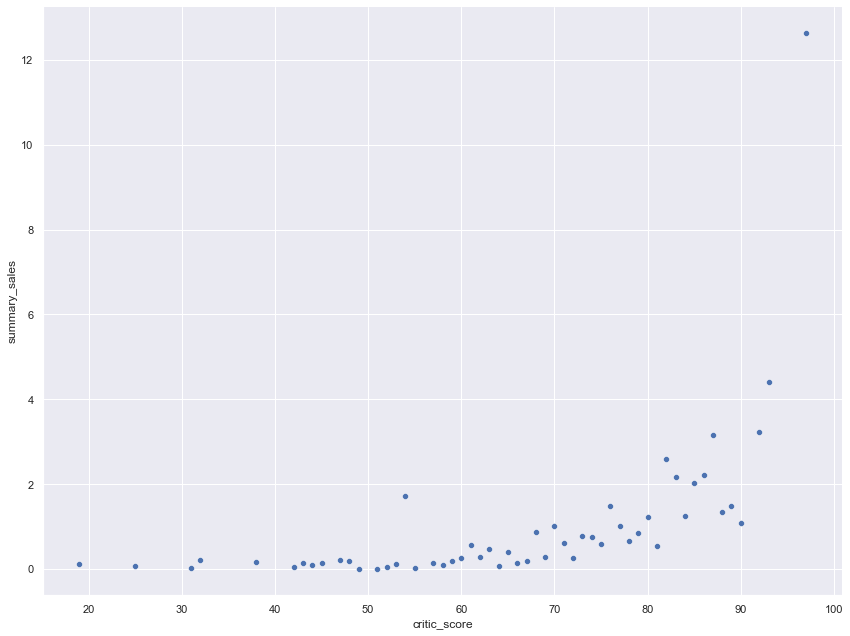

In [70]:
scatter_plot_data = ps4_data.pivot_table(index = 'critic_score', values = 'summary_sales', aggfunc = 'mean')
sns.relplot(data = scatter_plot_data, x = scatter_plot_data.index, y = scatter_plot_data['summary_sales'],
           height = 9, aspect = 1.33)
plt.show()

Некоторая взаимосвязь визуально прослеживается.

К-т корреляции оценок критиков и продаж

In [71]:
ps4_data['critic_score'].corr(ps4_data['summary_sales'])

0.40656790206178145

Далее повторим для показателя пользовательских оценок. Построим диаграму разброса.

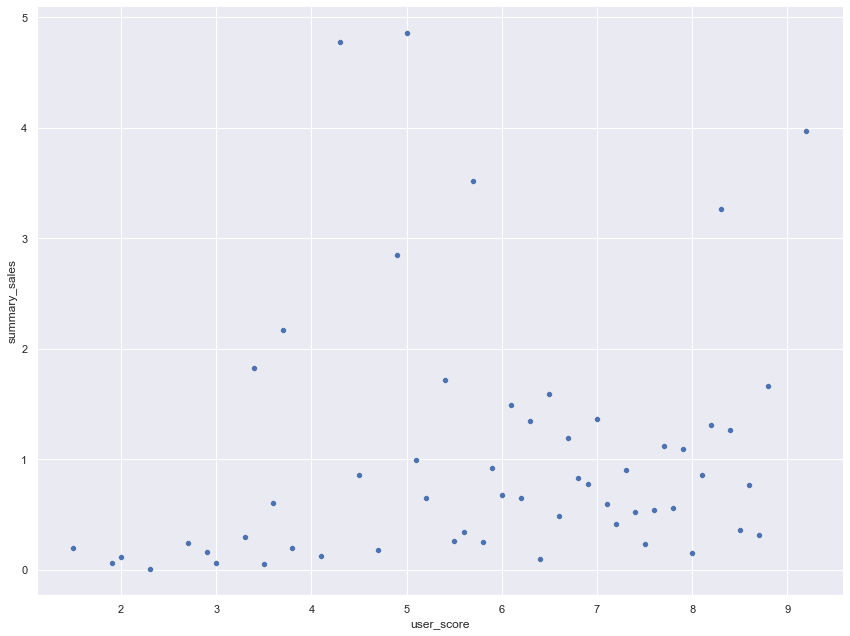

In [72]:
scatter_plot_data = ps4_data.pivot_table(index = 'user_score', values = 'summary_sales', aggfunc = 'mean')
sns.relplot(data = scatter_plot_data, x = scatter_plot_data.index, y = scatter_plot_data['summary_sales'],
           height = 9, aspect = 1.33)
plt.show()

Наблюдаем отсутствие связи.

К-т корреляции пользовательских оценок и продаж:

In [73]:
ps4_data['user_score'].corr(ps4_data['summary_sales'])

-0.03195711020455646

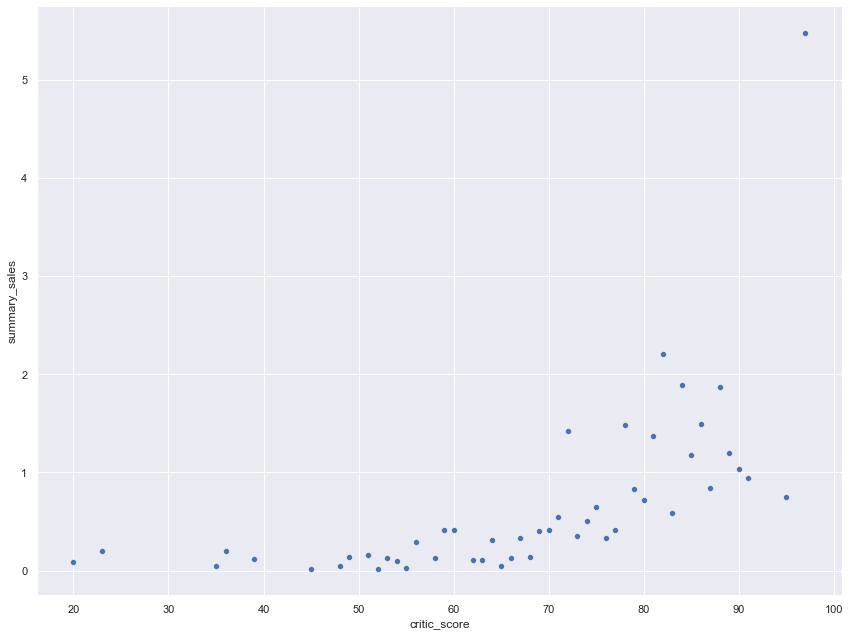

In [74]:
scatter_plot_data = data.query('platform == "xone"') \
.pivot_table(index = 'critic_score', values = 'summary_sales', aggfunc = 'mean')
sns.relplot(data = scatter_plot_data, x = scatter_plot_data.index, y = scatter_plot_data['summary_sales'],
           height = 9, aspect = 1.33)
plt.show()

In [75]:
data.query('platform == "xone"')['critic_score'].corr(data.query('platform == "xone"')['summary_sales'])

0.4169983280084016

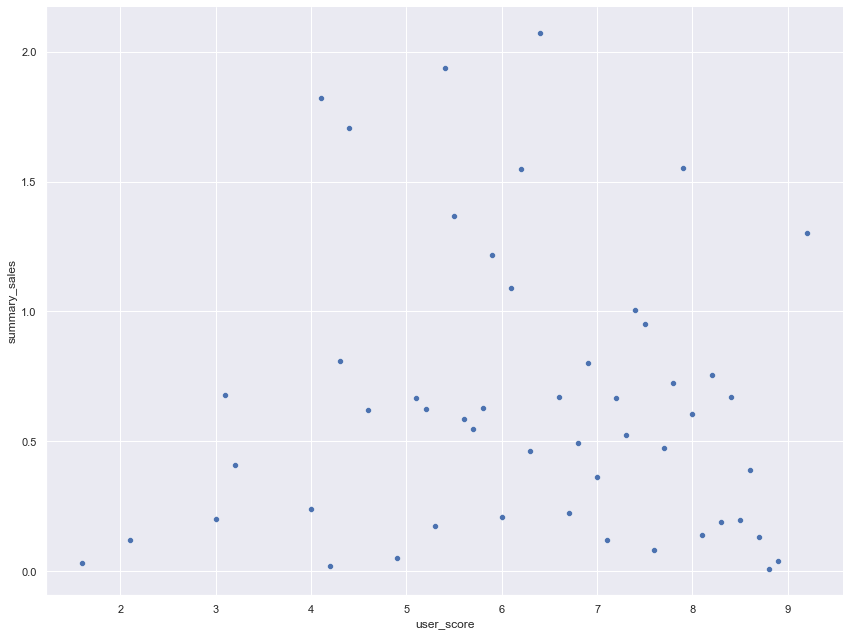

In [76]:
scatter_plot_data = data.query('platform == "xone"') \
.pivot_table(index = 'user_score', values = 'summary_sales', aggfunc = 'mean')
sns.relplot(data = scatter_plot_data, x = scatter_plot_data.index, y = scatter_plot_data['summary_sales'],
           height = 9, aspect = 1.33)
plt.show()

In [77]:
data.query('platform == "xone"')['user_score'].corr(data.query('platform == "xone"')['summary_sales'])

-0.0689250532827942

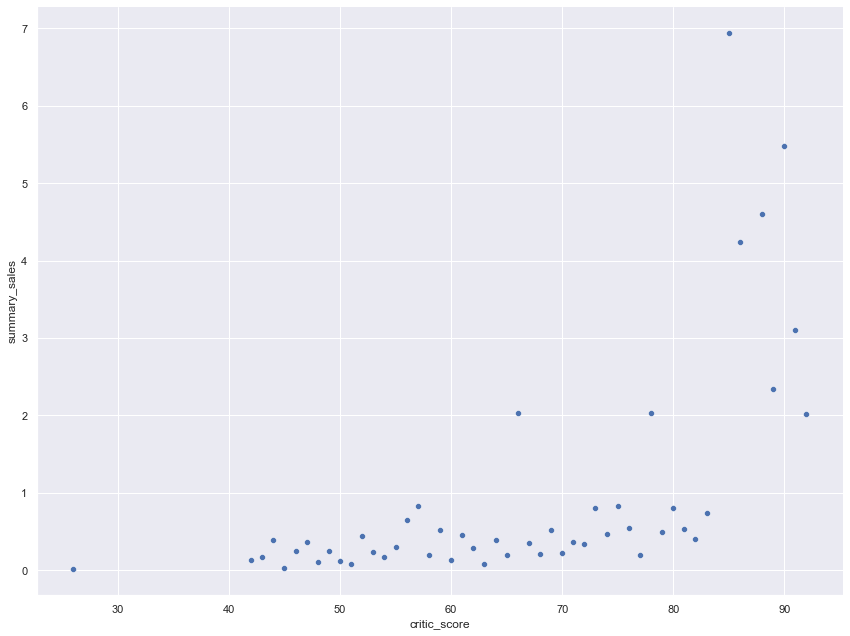

In [78]:
scatter_plot_data = data.query('platform == "3ds"') \
.pivot_table(index = 'critic_score', values = 'summary_sales', aggfunc = 'mean')
sns.relplot(data = scatter_plot_data, x = scatter_plot_data.index, y = scatter_plot_data['summary_sales'],
           height = 9, aspect = 1.33)
plt.show()

In [79]:
data.query('platform == "3ds"')['critic_score'].corr(data.query('platform == "3ds"')['summary_sales'])

0.34873973059848346

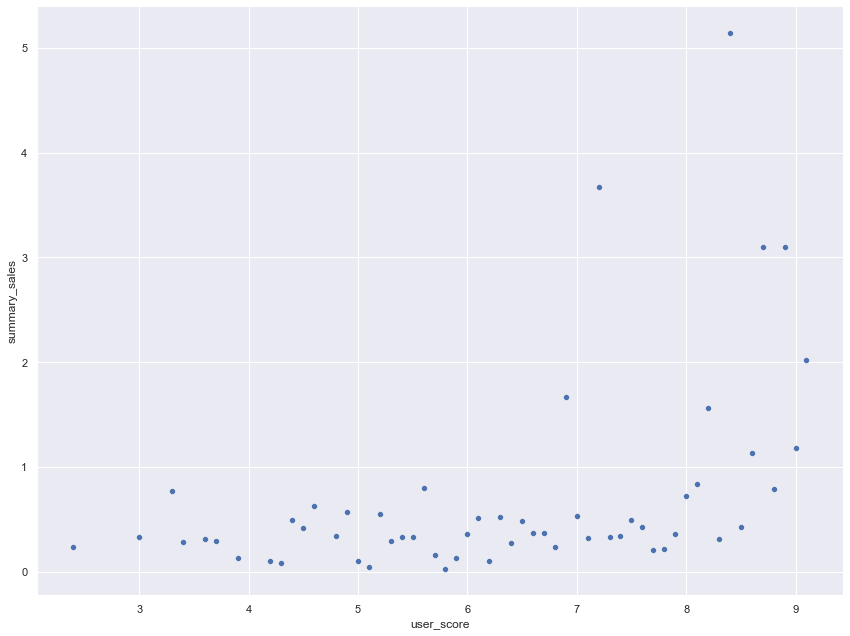

In [80]:
scatter_plot_data = data.query('platform == "3ds"') \
.pivot_table(index = 'user_score', values = 'summary_sales', aggfunc = 'mean')
sns.relplot(data = scatter_plot_data, x = scatter_plot_data.index, y = scatter_plot_data['summary_sales'],
           height = 9, aspect = 1.33)
plt.show()

In [81]:
data.query('platform == "3ds"')['user_score'].corr(data.query('platform == "3ds"')['summary_sales'])

0.22207843643390893

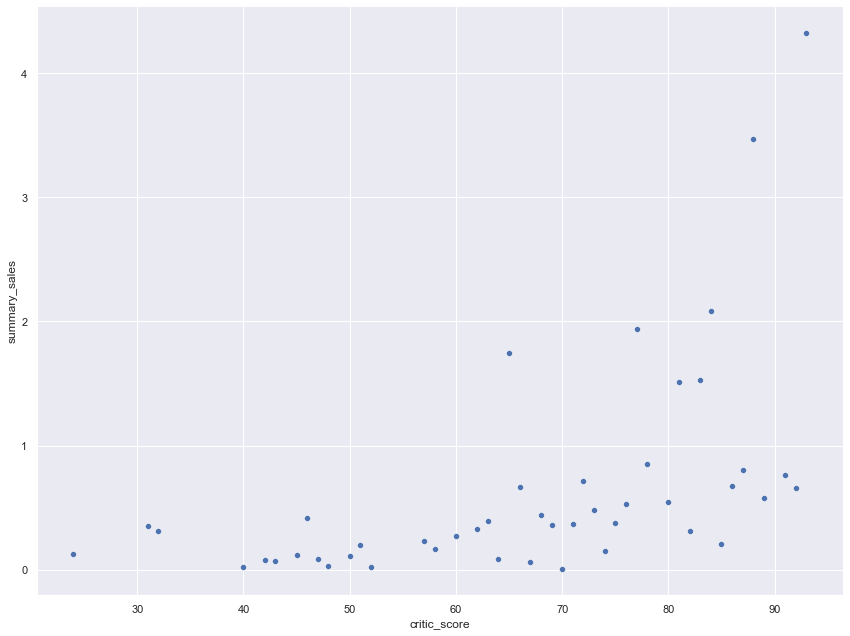

In [82]:
scatter_plot_data = data.query('platform == "wiiu"') \
.pivot_table(index = 'critic_score', values = 'summary_sales', aggfunc = 'mean')
sns.relplot(data = scatter_plot_data, x = scatter_plot_data.index, y = scatter_plot_data['summary_sales'],
           height = 9, aspect = 1.33)
plt.show()

In [83]:
data.query('platform == "wiiu"')['critic_score'].corr(data.query('platform == "wiiu"')['summary_sales'])

0.3483797601201749

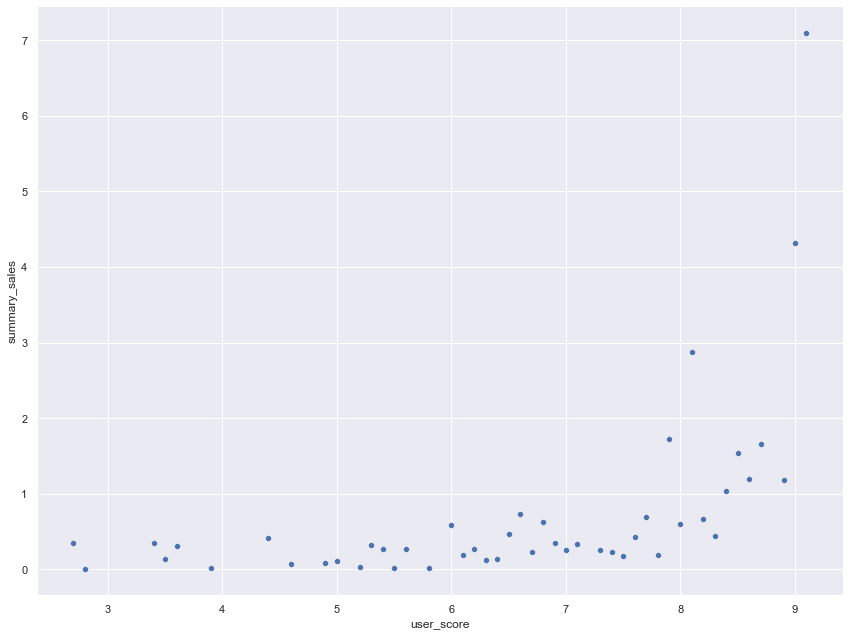

In [84]:
scatter_plot_data = data.query('platform == "wiiu"') \
.pivot_table(index = 'user_score', values = 'summary_sales', aggfunc = 'mean')
sns.relplot(data = scatter_plot_data, x = scatter_plot_data.index, y = scatter_plot_data['summary_sales'],
           height = 9, aspect = 1.33)
plt.show()

In [85]:
data.query('platform == "wiiu"')['user_score'].corr(data.query('platform == "wiiu"')['summary_sales'])

0.4002190202148619

Сравним полученные выше результаты со средними для всей выборки актуальных платформ. Ниже диаграмма разброса для показателя оценок критиков.

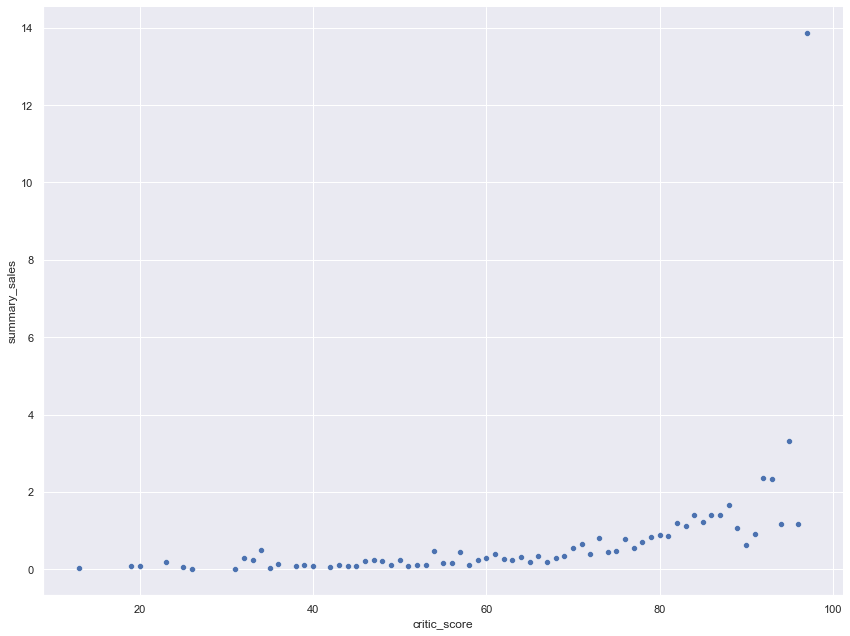

In [86]:
scatter_plot_data = data.query('(@starting_period <= year < 2100)') \
.pivot_table(index = 'critic_score', values = 'summary_sales', aggfunc = 'mean')
sns.relplot(data = scatter_plot_data, x = scatter_plot_data.index, y = scatter_plot_data['summary_sales'],
           height = 9, aspect = 1.33)
plt.show()

Для высоких оценок связь с результатами продаж вполне очевидна, для оценок ниже 70 -нет.

К-т кореляции:

In [87]:
data.query('(@starting_period <= year < 2100)')['critic_score'] \
.corr(data.query('(@starting_period <= year < 2100)')['summary_sales'])

0.31369951510273686

Диаграмма разброса для оценок пользователей:

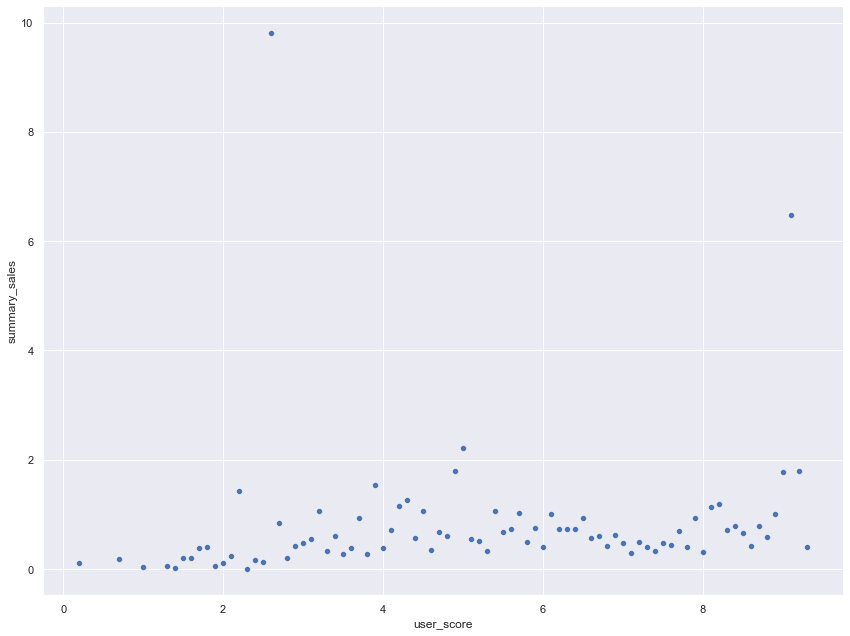

In [88]:
scatter_plot_data = data.query('(@starting_period <= year < 2100)') \
.pivot_table(index = 'user_score', values = 'summary_sales', aggfunc = 'mean')
sns.relplot(data = scatter_plot_data, x = scatter_plot_data.index, y = scatter_plot_data['summary_sales'],
           height = 9, aspect = 1.33)
plt.show()

Практически полное отсутствие связи.

К-т корреляции:

In [89]:
data.query('(@starting_period <= year < 2100)')['user_score'] \
.corr(data.query('(@starting_period <= year < 2100)')['summary_sales'])

-0.002607813354598268

Наблюдаем средней степени зависимость суммарных продаж от оценок критиков и отсутствие связи с оценками пользователей.

Выводы: можем предположить, что неинтересные игры просто не оценивают, для игр с высокими оценками связь между оценками и продажами прослеживается более очевидно.

<p>В результате проведенного анализа можем сделать вывод, что оценки пользователей практически не оказывают влияния на показатели продаж платформ XOne и PS4, но неплохо связаны с результатами 3DS и WiiU.</p>
<p>Оценки критиков более показательны - связь средней силы между оценками критиков и продажами.</p>

#### Распределение игр по жанрам

Выведем список наиболее продаваемых жанров:

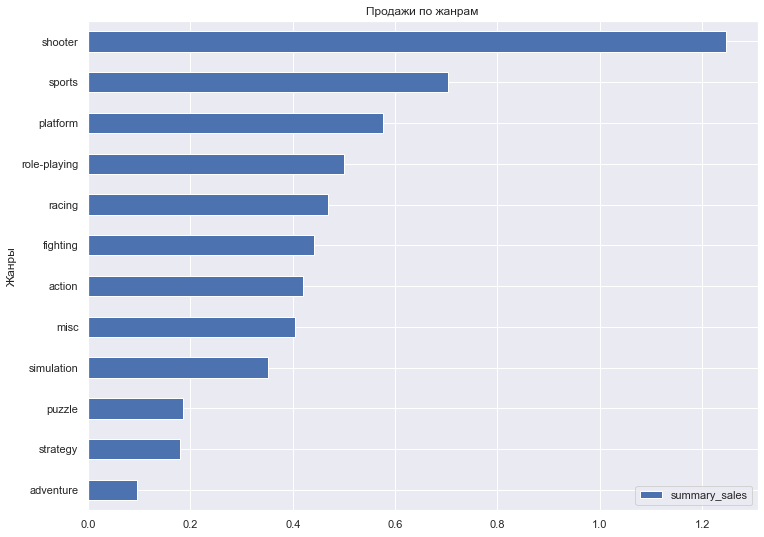

In [90]:
data.query('(@starting_period <= year < 2100)') \
.pivot_table(index = 'genre', values = 'summary_sales', aggfunc = 'mean') \
.sort_values(by = 'summary_sales') \
.plot(kind = 'barh', figsize = (12, 9), title = 'Продажи по жанрам', xlabel = 'Жанры')
plt.show()

Далее оценим развитие динамики продаж для каждого из жанров во времени. Применим тепловую карту. Подготовим таблицу для отображения. 

In [91]:
aggregated_by_genres_table = data.query('(@starting_period <= year < 2100)') \
.pivot_table(index = ['genre'], columns = ['year'], values = ['summary_sales'], 
             aggfunc = {'summary_sales': 'mean'}, fill_value = 0, margins = True) \
.sort_values(by = ('summary_sales', 'All'), ascending = False)
aggregated_by_genres_table

summary_sales                    
year                  2013 2014 2015 2016  All
genre                                         
shooter               1.05 1.39 1.99 0.81 1.25
sports                0.78 0.84 0.69 0.49 0.70
platform              0.68 0.88 0.47 0.22 0.58
role-playing          0.63 0.51 0.48 0.34 0.50
All                   0.66 0.57 0.44 0.26 0.49
racing                0.77 0.62 0.45 0.12 0.47
fighting              0.35 0.69 0.38 0.28 0.44
action                0.83 0.52 0.28 0.17 0.42
misc                  0.60 0.56 0.30 0.08 0.41
simulation            0.48 0.51 0.38 0.11 0.35
puzzle                0.32 0.21 0.12 0.01 0.19
strategy              0.32 0.12 0.12 0.09 0.18
adventure             0.10 0.07 0.15 0.07 0.10

Выведем карту:

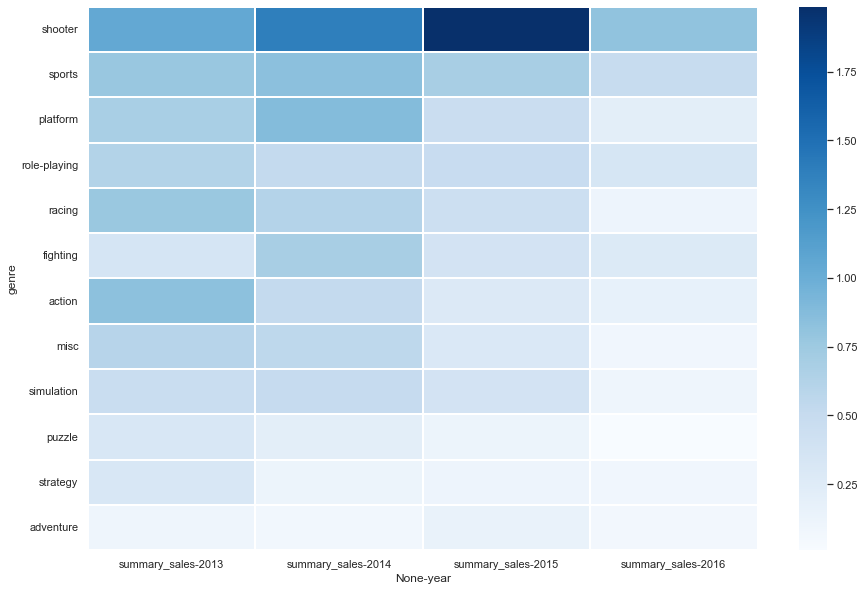

In [92]:
aggregated_by_genres_heat = aggregated_by_genres_table
aggregated_by_genres_heat \
.drop(['All'], axis = 0, inplace = True)
aggregated_by_genres_heat.drop(('summary_sales', 'All'), axis = 1, inplace = True)
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(aggregated_by_genres_heat, cmap = 'Blues', linewidth = .005, linecolor = 'white')
plt.show()

Вне конкуренции шутеры.

Теперь оценим различия в показателях продаж различных жанров в зависимости от платформы. Подготовим таблицу.

In [93]:
aggregated_by_genres_table = data.query('(@starting_period <= year < 2100)') \
.pivot_table(index = ['genre'], columns = ['platform'], values = ['summary_sales'], 
             aggfunc = {'summary_sales': 'mean'}, fill_value = 0, margins = True) \
.sort_values(by = ('summary_sales', 'All'), ascending = False)
aggregated_by_genres_table.head()

summary_sales                                                    \
platform               3ds   ds   pc  ps3  ps4  psp  psv  wii wiiu x360 xone   
genre                                                                          
shooter               0.06 0.00 0.31 1.03 2.16 0.00 0.72 0.00 0.68 1.04 1.59   
sports                0.23 0.03 0.15 0.69 1.21 0.14 0.12 0.32 0.49 0.84 0.70   
platform              0.59 0.35 0.04 0.37 0.64 0.00 0.08 1.12 1.08 0.36 0.19   
role-playing          1.09 0.00 0.27 0.34 0.57 0.15 0.13 0.00 0.39 0.55 0.75   
All                   0.47 0.19 0.21 0.53 0.80 0.05 0.09 0.59 0.56 0.74 0.65   

                   
platform      All  
genre              
shooter      1.25  
sports       0.70  
platform     0.58  
role-playing 0.50  
All          0.49

И выведем карту:

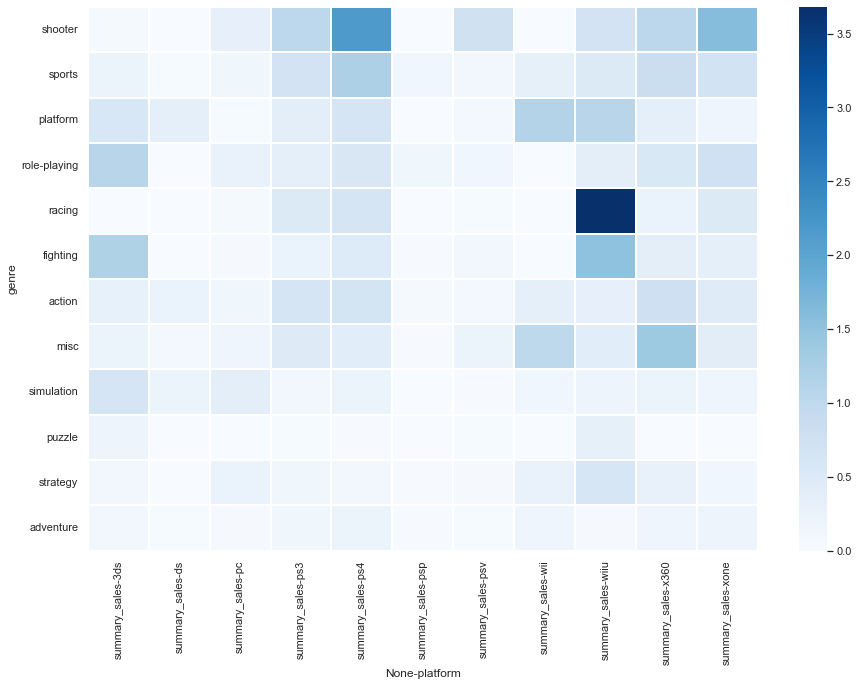

In [94]:
aggregated_by_genres_heat = aggregated_by_genres_table
aggregated_by_genres_heat \
.drop(['All'], axis = 0, inplace = True)
aggregated_by_genres_heat.drop(('summary_sales', 'All'), axis = 1, inplace = True)
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(aggregated_by_genres_heat, cmap = 'Blues', linewidth = .005, linecolor = 'white')
plt.show()

Помимо шутеров неплохо выступают рейсинги на WiiU

Выводы. Проведенный анализ позволил выявить наиболее доходные платформы: в первую очередь PS4 и XOne, а также самые популярные жанры: Shooter. Также мы выяснили, что неплохо продаются Racing для WiiU.

Зависимость продаж от оценок пользователей отсутствует, от оценок критиков имеется - средняя.

## Портрет пользователя

Выделим пять самых прибыльных платформ для каждого региона. Начнем с Северной Америки:

<AxesSubplot:xlabel='platform'>

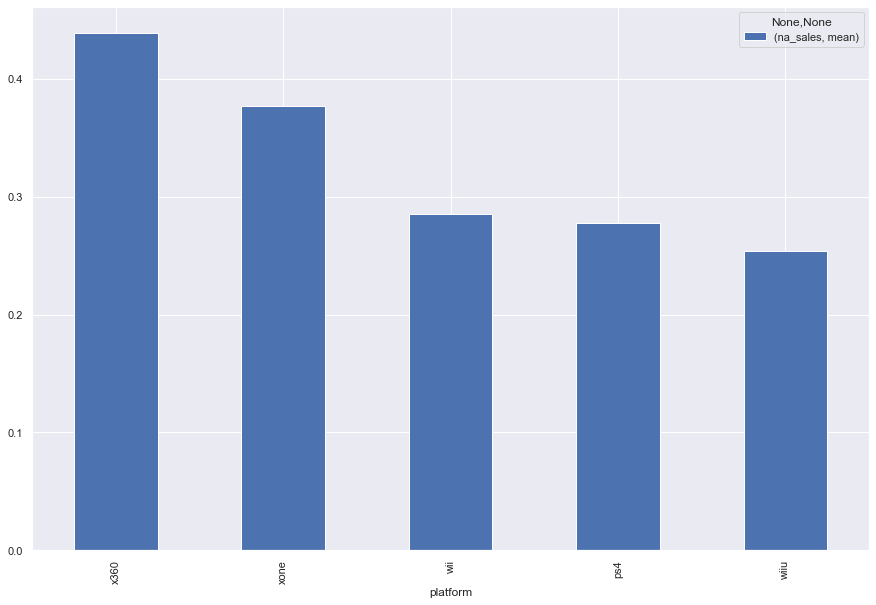

In [95]:
na_sales = data.query('(@starting_period <= year < 2100)') \
.groupby('platform').agg({'na_sales':['mean']}) \
.sort_values(('na_sales', 'mean'), ascending = False).head()
na_sales.plot(kind = 'bar')

Далее Евросоюз:

<AxesSubplot:xlabel='platform'>

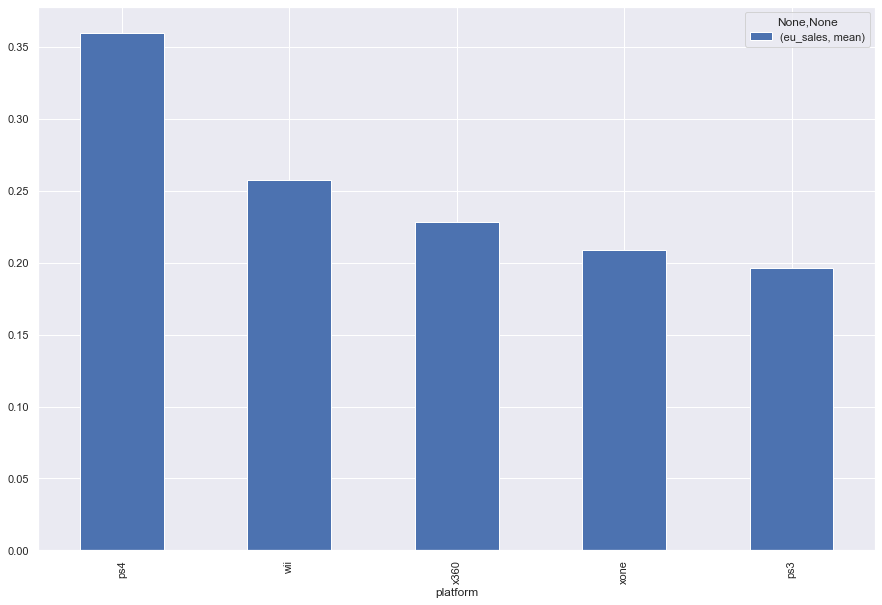

In [96]:
eu_sales = data.query('(@starting_period <= year < 2100)') \
.groupby('platform').agg({'eu_sales':['mean']}) \
.sort_values(('eu_sales', 'mean'), ascending = False).head()
eu_sales.plot(kind = 'bar')

Сравним с Японией:

<AxesSubplot:xlabel='platform'>

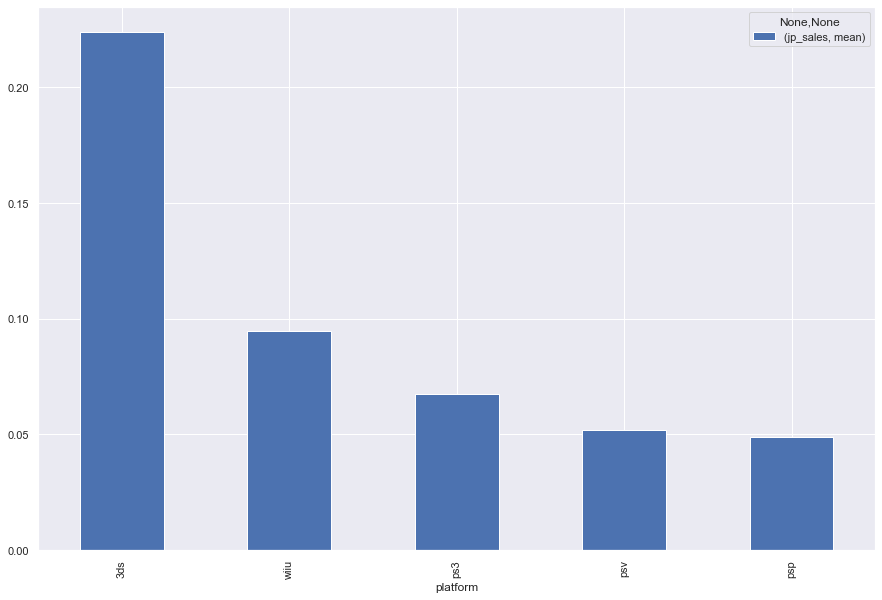

In [97]:
jp_sales = data.query('(@starting_period <= year < 2100)') \
.groupby('platform').agg({'jp_sales':['mean']}) \
.sort_values(('jp_sales', 'mean'), ascending = False).head()
jp_sales.plot(kind = 'bar')

Далее повторим для жанров. Северная Америка:

<AxesSubplot:xlabel='genre'>

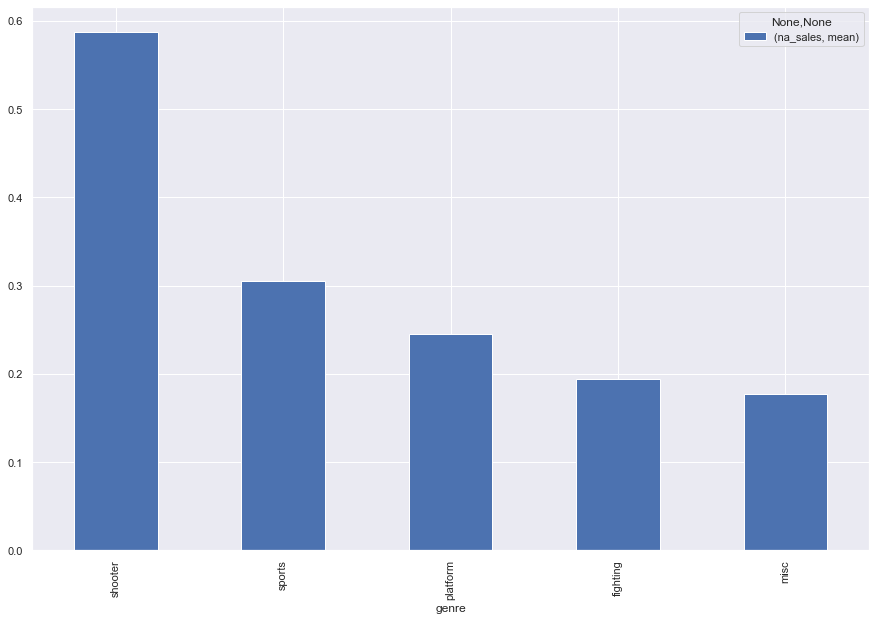

In [98]:
data.query('(@starting_period <= year < 2100)') \
.groupby('genre').agg({'na_sales':['mean']}) \
.sort_values(('na_sales', 'mean'), ascending = False).head().plot(kind = 'bar')

Евросоюз:

<AxesSubplot:xlabel='genre'>

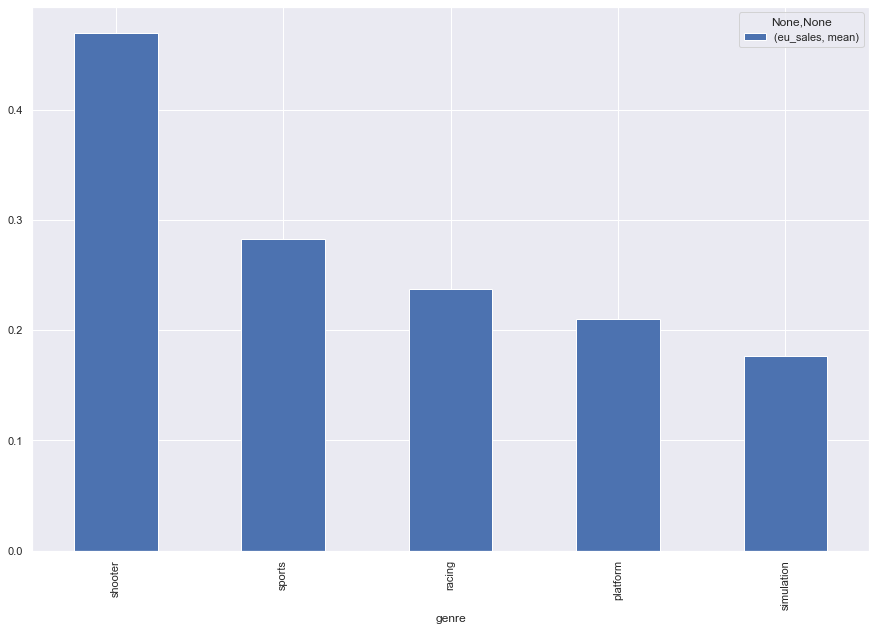

In [99]:
data.query('(@starting_period <= year < 2100)') \
.groupby('genre').agg({'eu_sales':['mean']}) \
.sort_values(('eu_sales', 'mean'), ascending = False).head().plot(kind = 'bar')

Япония:

<AxesSubplot:xlabel='genre'>

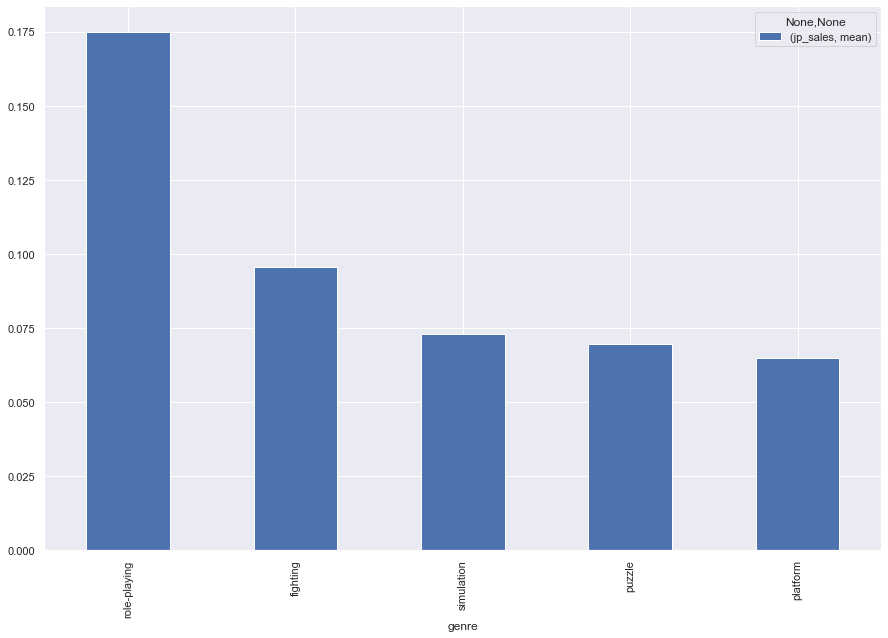

In [100]:
data.query('(@starting_period <= year < 2100)') \
.groupby('genre').agg({'jp_sales':['mean']}) \
.sort_values(('jp_sales', 'mean'), ascending = False).head().plot(kind = 'bar')

В завершение оценим влияние рейтинга ESRB на продажи в регионе.

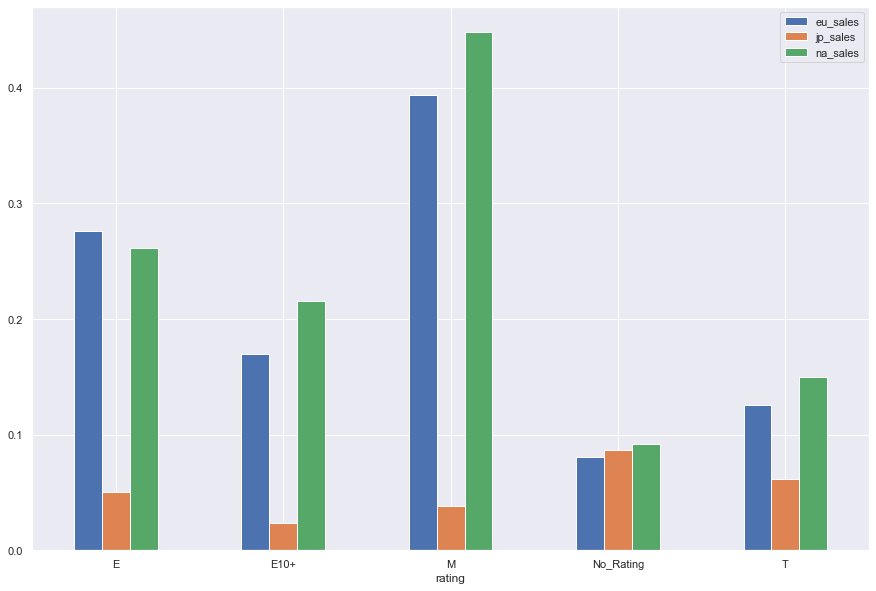

In [101]:
data.query('(@starting_period <= year < 2100)') \
.pivot_table(index = 'rating', values = ['na_sales', 'eu_sales', 'jp_sales'], aggfunc = 'mean') \
.plot(kind = 'bar', rot = 0)
plt.show()

Выводы: наблюдаем явно выраженные особенности по всем критериям.

Для платформ: в Северной Америке лидируют X360 и XOne, в Европе - PS4, в Японии 3DS.

Для жанров: в Северной Америке предпочтение отдают Shooter'ам, в Европе - также, в Японии - Role playing.

В Европе и Северной Америке преобладают игры категории M (для взрослой аудитории). В Японии на первом месте игры без рейтинга.

## Проверка гипотез

Проверим пользовательские оценки разных платформ.

Сформулируем нулевую гипотезу: Средняя пользовательская оценка XOne равна PC.

Альт. гипотеза: ср. оценки не равны

In [102]:
xone_ratings = data.query('(@starting_period <= year < 2100) and (platform == "xone") and (user_score.notna())') \
['user_score']
pc_ratings = data.query('(@starting_period <= year < 2100) and (platform == "pc") and (user_score.notna())') \
['user_score']

In [103]:
print(xone_ratings.mean(), pc_ratings.mean())

6.52142857142857 6.269677419354836


In [104]:
results = st.ttest_ind (xone_ratings, pc_ratings, equal_var = False)
alpha = 0.01
print(results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


Вывод: средние оценки равны (с вероятность 99%).

Проверим пользовательские оценки разных жанров.

Сформулируем нулевую гипотезу: Средний рейтинг Action и Sports равны.

Альт. гипотеза : ср. рейтинги разные.

In [105]:
action_ratings = data.query('(@starting_period <= year < 2100) and (genre == "action") and (user_score.notna())') \
['user_score']
sports_ratings = data.query('(@starting_period <= year < 2100) and (genre == "sports") and (user_score.notna())') \
['user_score']

In [106]:
print(action_ratings.mean(), sports_ratings.mean())

6.837532133676097 5.238124999999999


In [107]:
results = st.ttest_ind (action_ratings, sports_ratings, equal_var = False)
alpha = 0.01
print(results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

1.4460039700704315e-20
Отвергаем нулевую гипотезу


Вывод: оценки жанров различаются.

## Выводы:

В результате проведенного анализа выделили наиболее актуальные платформы - это, в первую очередь PS4, далее с некоторым отрывом идет XOne, далее 3DS, PSV, WiiU.

Популярность платформ имеет региональные особенности - в Северной Америке на первом месте XOne, в Европе PS4, в Японии с большим отрывом лидирует 3DS.

В разрезе жанров лидируют Shooter и Role - playing. Также имеются региональные отличия: в Северной Америке и Европе это Shooter, в стране Восходящего солнца - Role - playing.

Для оценок критиков к-т корреляции составил в среднем 0,3. Для PS4 и XOne - 0,4. Для платформ 3DS и WiiU - 0,35.

Для оценок пользователей к-т корреляции в среднем близки к нулю. Для 3DS - 0,35. Для WiiU - 0,4.

В результате проведенного статистического исследования подтвердилась гипотеза о равенстве средних оценок пользователей платформ xOne и PC, а также подтвердилась гипотеза о различии средних оценок пользователей жанров Action и Sports.

Рекомендуем продвигать шутеры на XOne в Северной Америке, шутеры на PS4 в Европе и Role - playing для 3DS (а также Racing на wiiU) в Японии.

В целом, можем ориентироваться на оценки критиков. Кроме того, для платформ 3DS и WiiU важны также оценки пользователей.

Благодарю за внимание!